In [1]:
import os
import numpy as np
import random
import scipy.sparse as sparse
from scipy.sparse import *
from sklearn.utils import shuffle
import pandas as pd
from math import ceil
from tqdm import trange
from sklearn.metrics import *
import sys
import pickle
from itertools import islice

data dimension: 
 (35484, 3)
data dimension: 
 (34130, 3)


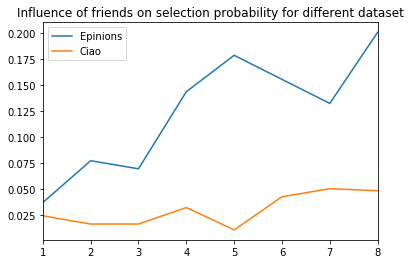

In [4]:
directories = ['Epinions','Ciao','Lthing','filmtrust']
data_probabilites = []
from matplotlib import pyplot as plt
for directory in directories:
    file_dir = '/Users/payoj/Documents/Spring 2019/Recommender Systems/data/'+directory
    pos_file = open(file_dir+"/positive_feedback_dataframe.pkl",'rb')
    P = positive_df = pickle.load(pos_file)
    trust_file = open(file_dir+"/trust_dataframe.pkl", 'rb')
    F = pickle.load(trust_file)
    users = list(P['user'].unique())   
    user_item_dict = dict([user, list(P.query('user == @user')['item'].unique())] for user in users)
    num_of_friends = F.groupby('user').count()
    num_of_friends.drop('trust', axis=1, inplace=True)
    num_of_friends = num_of_friends.rename(columns={"friend": "# friends"})
    friends_dict = {}
    for user in users:
        key_list = num_of_friends.query('user == @user')["# friends"].values
        if(len(key_list) != 0):
            key = key_list[0]
            if key<9:
                friends = list(F.query('user == @user')['friend'])
                if key not in friends_dict:
                    friends_dict[key] = {user:friends}
                else:
                    friends_dict[key][user] = friends

    probabilties = {}
    # users = list(user_item_dict.keys())
    for key in friends_dict:
        count_user_items = 0
        count_friends_items = 0
        users = list(friends_dict[key].keys())
        probability = []
        for user in users:
            friends = friends_dict[key][user]
            items_list = set(user_item_dict[user])
            friends_list = set()
            for friend in friends:
                if friend in user_item_dict:
                    friend_item_list = set(user_item_dict[friend])
                    friends_list.update(friend_item_list)
            probability.append(len(items_list.intersection(friends_list))/len(friends_list))
        probabilties[key] = sum(probability)/len(probability)*key
    
    x = sorted(probabilties.keys())
    y = [probabilties[x_i] for x_i in x]
    
    plt.plot(x,y, label=directory)
    plt.xlim(1,8)
    plt.legend()
    plt.title("Influence of friends on selection probability for different dataset")
    plt.savefig('/Users/payoj/Documents/Spring 2019/Recommender Systems/influence.pdf')